In [ ]:
import bt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Benchmark

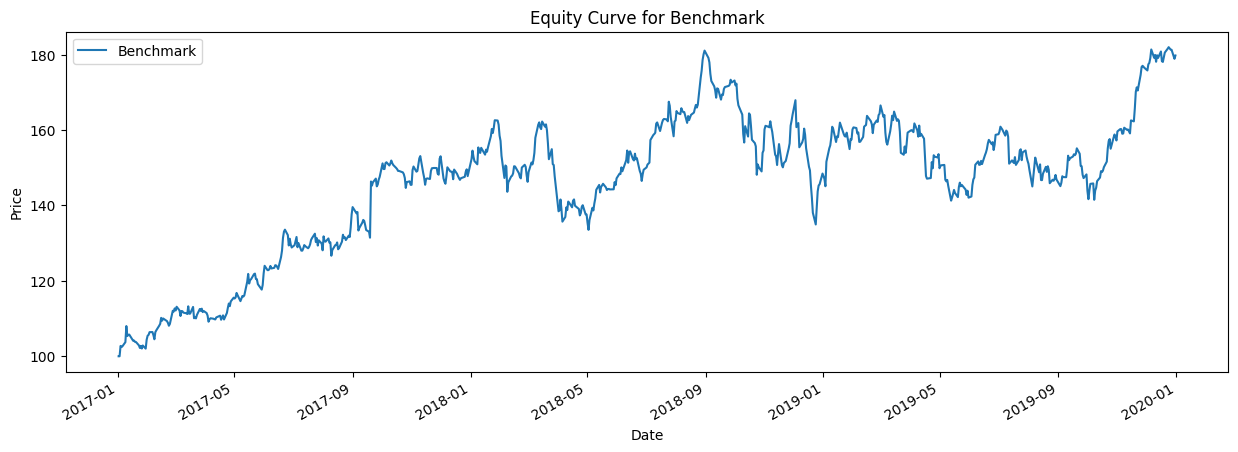

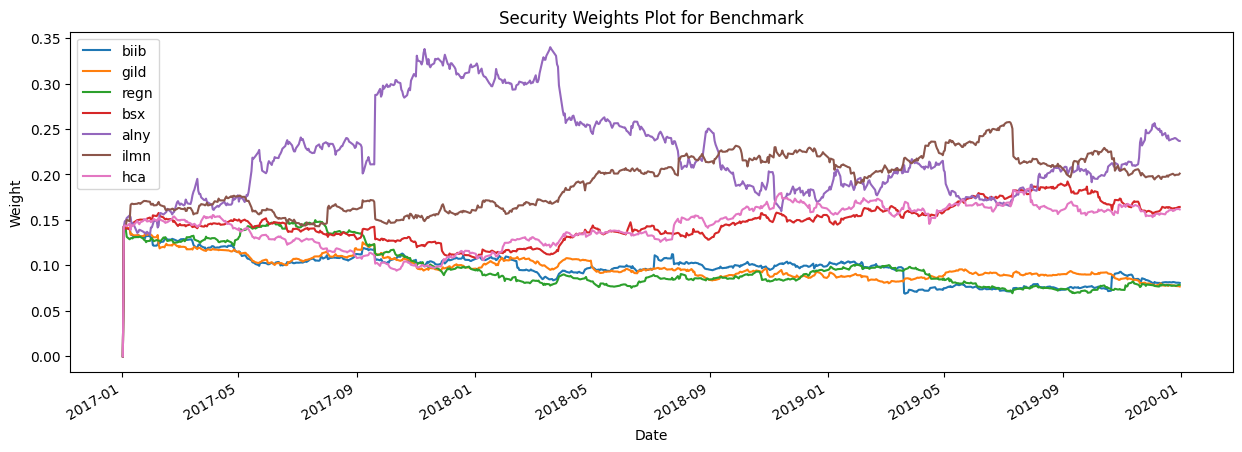

In [ ]:
# Define tickers and date range
tickers = ['BIIB', 'GILD', 'REGN', 'BSX', 'ALNY', 'ILMN', 'HCA']
start_date = '2017-01-01'
end_date = '2020-01-01'

# Get the data of the benchmark
data_benchmark = bt.get(tickers, start=start_date, end=end_date)

# Set up the benchmark Buy and Hold strategy
benchmark_strat = bt.Strategy('Benchmark', [bt.algos.RunOnce(),
                                                bt.algos.SelectAll(),
                                                bt.algos.WeighEqually(),
                                                bt.algos.Rebalance()])

# Backtest the benchmark strategy
test_benchmark = bt.Backtest(benchmark_strat, data_benchmark)
res_benchmark = bt.run(test_benchmark)

## Benchmark plots
res_benchmark.plot()
plt.title('Equity Curve for Benchmark')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
res_benchmark.plot_security_weights()
plt.title('Security Weights Plot for Benchmark')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.grid(False)
plt.show()

# EMA Cossover Strategy

## Baseline EMA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

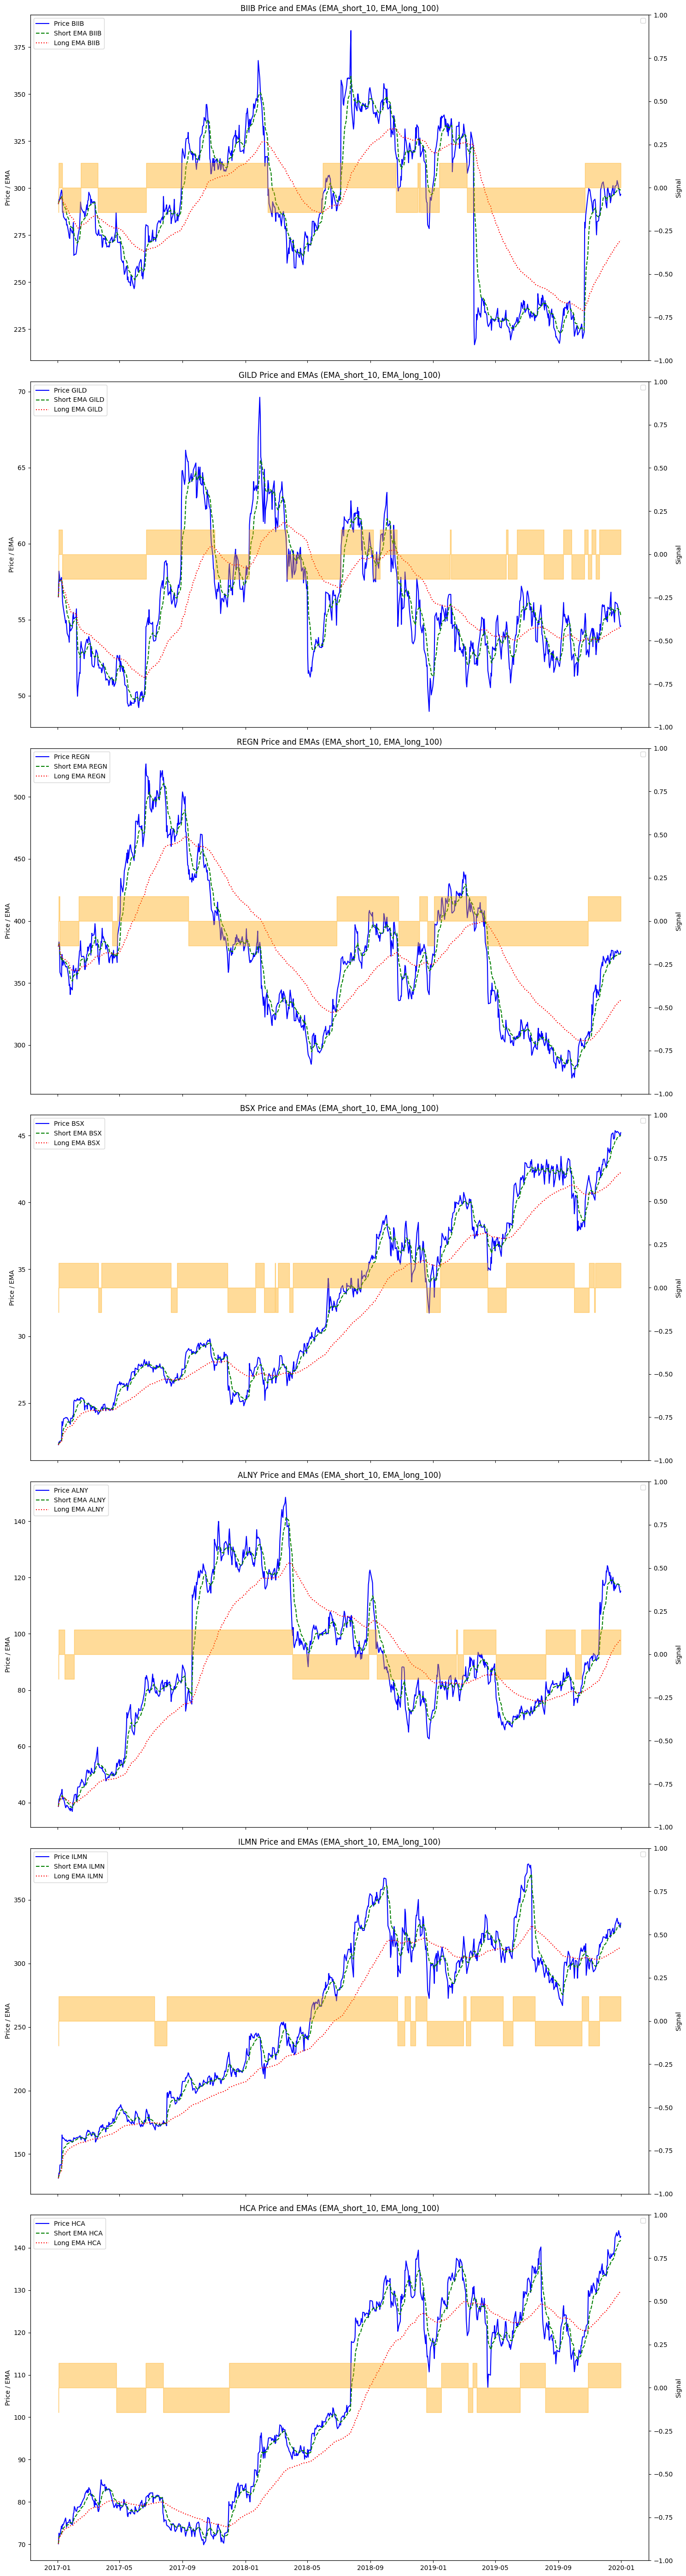

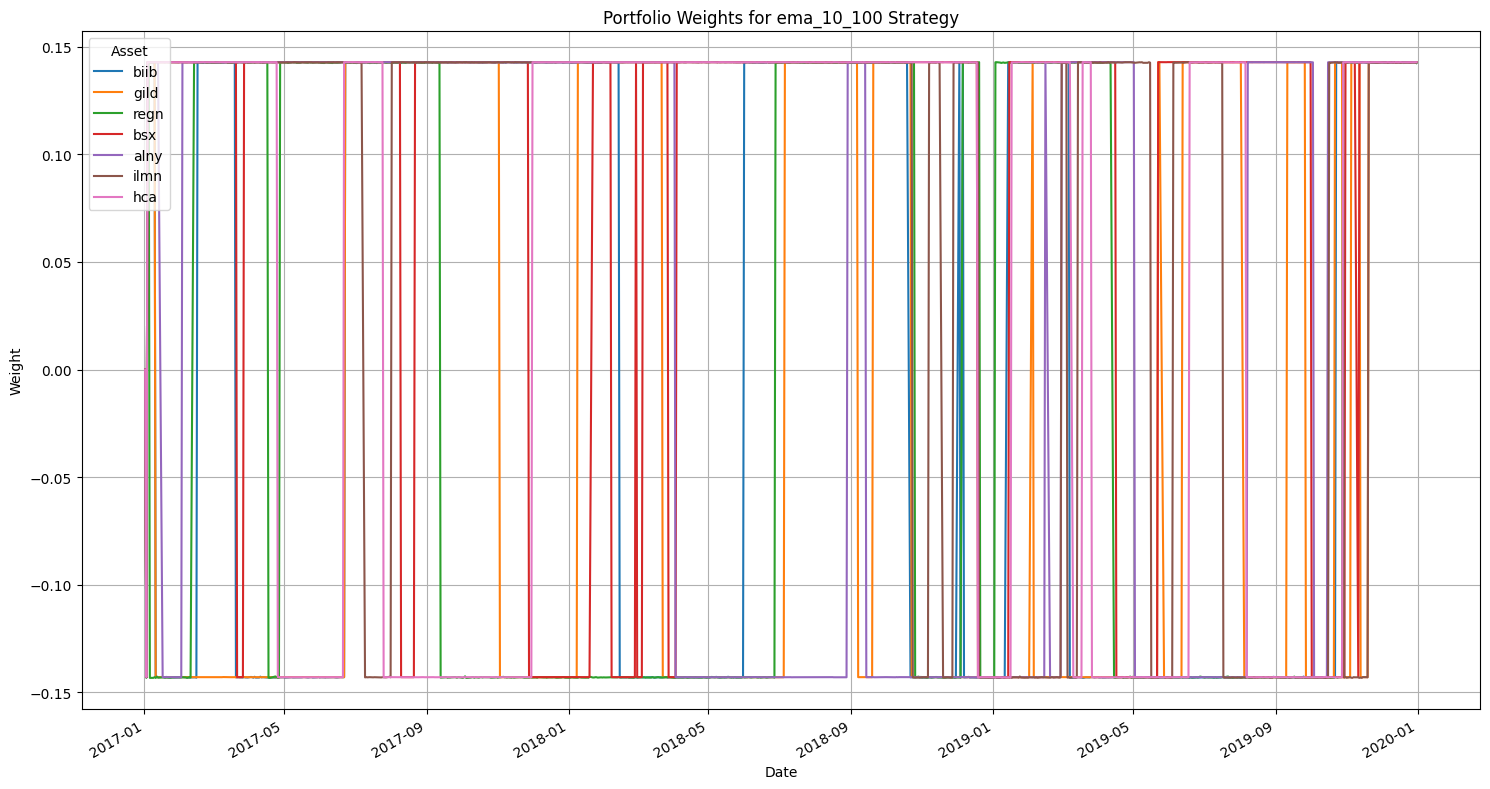

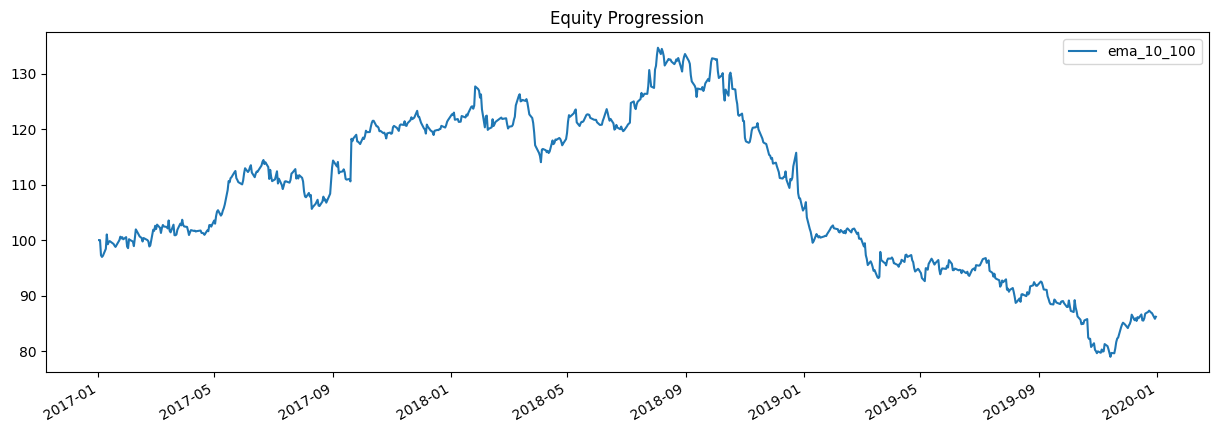

<Figure size 1500x800 with 0 Axes>

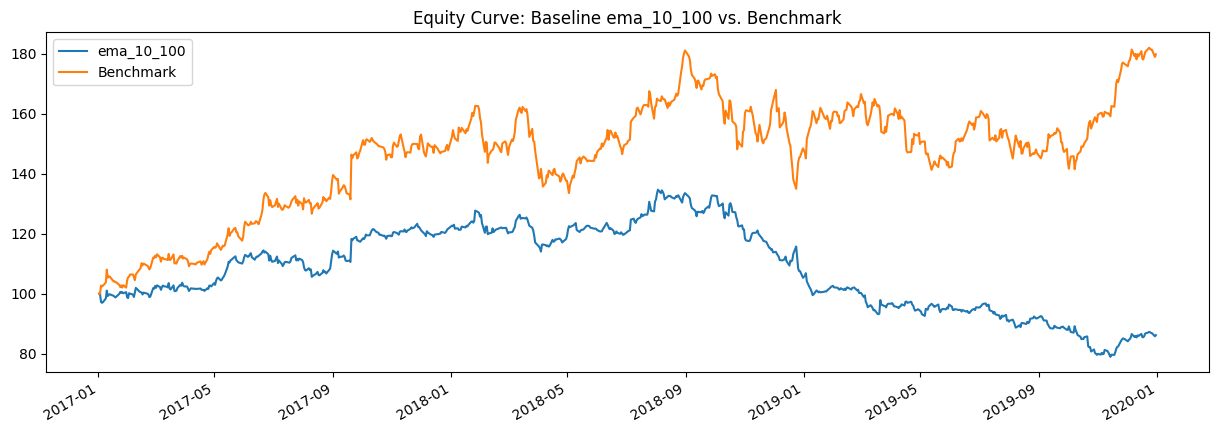

         Stat Benchmark Baseline_ema_10_100
 Total Return    79.74%             -13.80%
 Daily Sharpe      0.97               -0.27
Daily Sortino      1.67               -0.44
         CAGR    21.65%              -4.84%
 Max Drawdown   -25.46%             -41.34%
 Calmar Ratio      0.85               -0.12


In [ ]:
##### Baseline EMA Cross over ######
# Define tickers and date range
tickers = ['BIIB', 'GILD', 'REGN', 'BSX', 'ALNY', 'ILMN', 'HCA']
start_date = '2017-01-01'
end_date = '2020-01-01'

# Load data
data = bt.get(tickers, start=start_date, end=end_date)

# Baseline model
# Calculate indicators using exponential moving average
EMA_short = data.ewm(span=10).mean()
EMA_long = data.ewm(span=100).mean()

# Create signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0

# Construct the signal
magnitude = 1 / len(tickers)
signal[EMA_short > EMA_long] = magnitude
signal[EMA_short <= EMA_long] = -magnitude

# Construct strategy based on signal
MA_cross = bt.Strategy('ema_10_100',
                       [bt.algos.WeighTarget(signal),
                        bt.algos.Rebalance()])

# Backtest
bt_MA = bt.Backtest(MA_cross, data)

res_ema_baseline = bt.run(bt_MA)



#################################################################################################################
# Merged PLOTS:
# Merge signal, data, EMA_short, EMA_long into a single DataFrame for plotting
combined_df = bt.merge(signal, data, EMA_short, EMA_long)
combined_df.columns = [
    'Signal_BIIB', 'Signal_GILD', 'Signal_REGN', 'Signal_BSX', 'Signal_ALNY', 'Signal_ILMN', 'Signal_HCA',
    'Price_BIIB', 'Price_GILD', 'Price_REGN', 'Price_BSX', 'Price_ALNY', 'Price_ILMN', 'Price_HCA',
    'EMA_short_BIIB', 'EMA_short_GILD', 'EMA_short_REGN', 'EMA_short_BSX', 'EMA_short_ALNY', 'EMA_short_ILMN', 'EMA_short_HCA',
    'EMA_long_BIIB', 'EMA_long_GILD', 'EMA_long_REGN', 'EMA_long_BSX', 'EMA_long_ALNY', 'EMA_long_ILMN', 'EMA_long_HCA'
]

# Plot the signal, price, and MAs
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(15, 8 * len(tickers)), sharex=True)
colors = {'Price': 'blue', 'EMA_short': 'green', 'EMA_long': 'red', 'Signal': 'orange'}

for i, ticker in enumerate(tickers):
    axes[i].plot(combined_df.index, combined_df[f'Price_{ticker}'], label=f'Price {ticker}', color=colors['Price'])
    axes[i].plot(combined_df.index, combined_df[f'EMA_short_{ticker}'], label=f'Short EMA {ticker}', linestyle='--', color=colors['EMA_short'])
    axes[i].plot(combined_df.index, combined_df[f'EMA_long_{ticker}'], label=f'Long EMA {ticker}', linestyle=':', color=colors['EMA_long'])

    ax2 = axes[i].twinx()
    ax2.fill_between(combined_df.index, combined_df[f'Signal_{ticker}'], step='mid', alpha=0.4, color=colors['Signal'])
    ax2.set_ylim([-1, 1])
    ax2.set_ylabel('Signal')

    axes[i].set_title(f'{ticker} Price and EMAs (EMA_short_10, EMA_long_100)')
    axes[i].set_ylabel('Price / EMA')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot the portfolio weights for each strategy
# Get the weights for each strategy
weights = res_ema_baseline.get_security_weights('ema_10_100')

fig, ax = plt.subplots(figsize=(15, 8))

weights.plot(ax=ax, title='Portfolio Weights for ema_10_100 Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Weight')
ax.legend(title='Asset', loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

#########################################################################
# Equity Curves
res_ema_baseline.plot()

# Plot the equity curve for the strategy and the benchmark
plt.figure(figsize=(15, 8))
res_ema_baseline.plot(title='Equity Curve: Baseline ema_10_100 vs. Benchmark')
res_benchmark.plot(title='Equity Curve: Baseline ema_10_100 vs. Benchmark', ax=plt.gca())
plt.legend(['ema_10_100', 'Benchmark'])
plt.show()

#########################################################################################
# Extract key metrics for the summary table
resInfo = res_ema_baseline.stats
total_return = resInfo.loc['total_return']
daily_sortino = resInfo.loc['daily_sortino']
daily_sharpe = resInfo.loc['daily_sharpe']
max_drawdown = resInfo.loc['max_drawdown']
calmar_ratio = resInfo.loc['calmar']
cagr = resInfo.loc['cagr']

resInfo_bm = res_benchmark.stats
total_return_bm = resInfo_bm.loc['total_return']
daily_sortino_bm = resInfo_bm.loc['daily_sortino']
daily_sharpe_bm = resInfo_bm.loc['daily_sharpe']
max_drawdown_bm = resInfo_bm.loc['max_drawdown']
calmar_ratio_bm = resInfo_bm.loc['calmar']
cagr_bm = resInfo_bm.loc['cagr']

# Create a DataFrame to hold the summary metrics
summary_df = pd.DataFrame({
    'Stat': [
        'Total Return',
        'Daily Sharpe',
        'Daily Sortino',
        'CAGR',
        'Max Drawdown',
        'Calmar Ratio'
    ],

     'Benchmark': [
        f"{total_return_bm['Benchmark']:.2%}",
        f"{daily_sharpe_bm['Benchmark']:.2f}",
        f"{daily_sortino_bm['Benchmark']:.2f}",
        f"{cagr_bm['Benchmark']:.2%}",
        f"{max_drawdown_bm['Benchmark']:.2%}",
        f"{calmar_ratio_bm['Benchmark']:.2f}"
    ],

    'Baseline_ema_10_100': [
        f"{total_return['ema_10_100']:.2%}",
        f"{daily_sharpe['ema_10_100']:.2f}",
        f"{daily_sortino['ema_10_100']:.2f}",
        f"{cagr['ema_10_100']:.2%}",
        f"{max_drawdown['ema_10_100']:.2%}",
        f"{calmar_ratio['ema_10_100']:.2f}"
    ]
})

# Display the summary table
print(summary_df.to_string(index=False))

## Optimization

Best Total Return: Long EMA 135, Short EMA 22 with value 0.01
Best Daily Sharpe: Long EMA 135, Short EMA 22 with value 0.09
Best Daily Sortino: Long EMA 135, Short EMA 22 with value 0.15
Best CAGR: Long EMA 135, Short EMA 22 with value 0.00
Best Calmar Ratio: Long EMA 135, Short EMA 22 with value 0.01


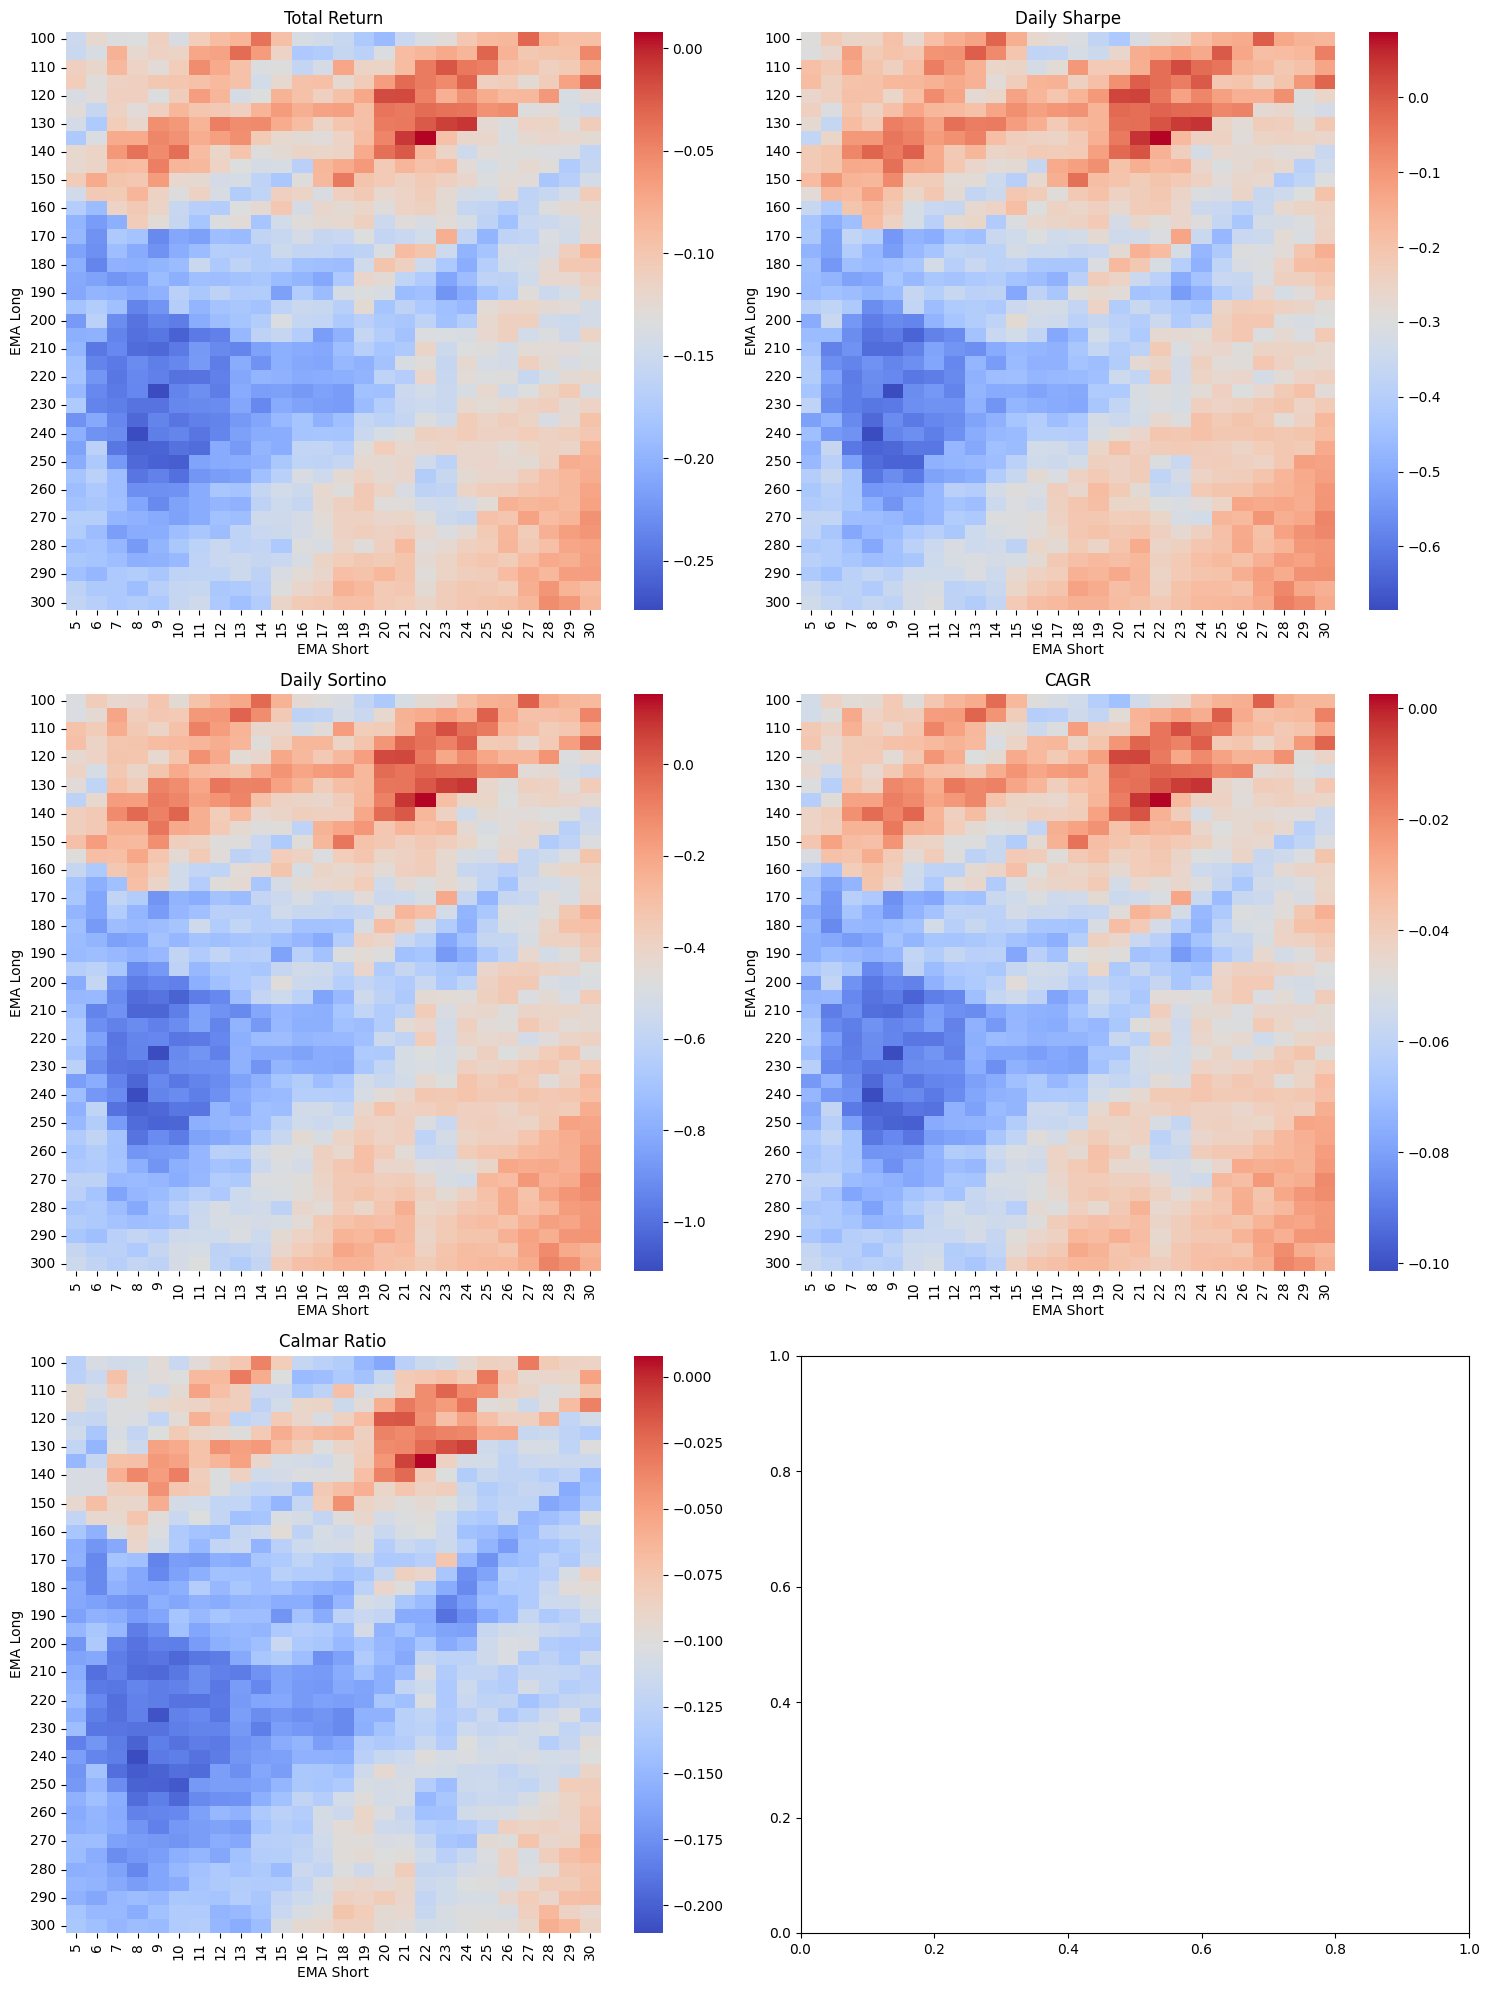

Best combination for Total Return is Long EMA 135 and Short EMA 22
Best combination for Daily Sharpe is Long EMA 135 and Short EMA 22
Best combination for Daily Sortino is Long EMA 135 and Short EMA 22
Best combination for CAGR is Long EMA 135 and Short EMA 22
Best combination for Calmar Ratio is Long EMA 135 and Short EMA 22


In [ ]:
# Define a range of days for short and long EMAs
ema_short_range = range(5, 31, 1)
ema_long_range = range(100, 301, 5)

# Create a dictionary to store the dataframes for each metric
metrics = ['Total Return', 'Daily Sharpe', 'Daily Sortino', 'CAGR', 'Calmar Ratio']
dfs = {metric: pd.DataFrame(index=ema_long_range, columns=ema_short_range) for metric in metrics}

# Iterate through each combination of EMA_short and EMA_long
for ema_short in ema_short_range:
    for ema_long in ema_long_range:
        if ema_short >= ema_long:
            continue  # Skip invalid combinations where EMA_short is greater than or equal to EMA_long

        # Calculate indicators using exponential moving average
        EMA_short = data.ewm(span=ema_short).mean()
        EMA_long = data.ewm(span=ema_long).mean()

        # Create signal DataFrame
        signal = (EMA_short > EMA_long).astype(float) - (EMA_short <= EMA_long).astype(float)
        signal /= len(tickers)  # Normalize the magnitude

        # Construct strategy based on signal
        strategy_name = f'MA_cross_{ema_short}_{ema_long}'
        MA_cross = bt.Strategy(strategy_name, [bt.algos.WeighTarget(signal), bt.algos.Rebalance()])

        # Backtest
        bt_MA = bt.Backtest(MA_cross, data)
        res_MA = bt.run(bt_MA)

        # Extract and store key metrics for the summary table
        dfs['Total Return'].loc[ema_long, ema_short] = res_MA.stats.at['total_return', strategy_name]
        dfs['Daily Sharpe'].loc[ema_long, ema_short] = res_MA.stats.at['daily_sharpe', strategy_name]
        dfs['Daily Sortino'].loc[ema_long, ema_short] = res_MA.stats.at['daily_sortino', strategy_name]
        dfs['CAGR'].loc[ema_long, ema_short] = res_MA.stats.at['cagr', strategy_name]
        dfs['Calmar Ratio'].loc[ema_long, ema_short] = res_MA.stats.at['calmar', strategy_name]

# # Display the DataFrames to see results
# for metric, df in dfs.items():
#     print(f"{metric} DataFrame:")
#     print(df)
#     print("\n")

# Plotting the heatmaps
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
best_combinations = {}
for ax, (metric, df) in zip(axes.flatten(), dfs.items()):
    sns.heatmap(df.astype(float), ax=ax, annot=False, fmt=".2f", cmap="coolwarm")
    ax.set_title(metric)
    ax.set_xlabel('EMA Short')
    ax.set_ylabel('EMA Long')
    # Find the best combination
    max_value = df.max().max()
    best_combination = df.stack().idxmax()
    best_combinations[metric] = best_combination
    print(f"Best {metric}: Long EMA {best_combination[0]}, Short EMA {best_combination[1]} with value {max_value:.2f}")

plt.tight_layout()
plt.show()

# Print all best combinations
for metric, combo in best_combinations.items():
    print(f"Best combination for {metric} is Long EMA {combo[0]} and Short EMA {combo[1]}")



In [ ]:
best_combinations

{'Total Return': (135, 22),
 'Daily Sharpe': (135, 22),
 'Daily Sortino': (135, 22),
 'CAGR': (135, 22),
 'Calmar Ratio': (135, 22)}

## Run on optimals

In [ ]:
# Optimal EMA settings from best_combinations for 'Total Return'
optimal_ema_short = best_combinations['Total Return'][1]
optimal_ema_long = best_combinations['Total Return'][0]

# Column name dynamically generated from EMA values
column_name_ema = f"Optimal EMA_{optimal_ema_short}_{optimal_ema_long}"

# Calculate the exponential moving averages for the optimal settings
EMA_short_optimal = data.ewm(span=optimal_ema_short).mean()
EMA_long_optimal = data.ewm(span=optimal_ema_long).mean()

# Create signal DataFrame similar to the baseline
signal_optimal = EMA_long_optimal.copy()
signal_optimal[EMA_long_optimal.isnull()] = 0

# Construct the signal with magnitude
magnitude_optimal = 1 / len(tickers)
signal_optimal[EMA_short_optimal > EMA_long_optimal] = magnitude_optimal
signal_optimal[EMA_short_optimal <= EMA_long_optimal] = -magnitude_optimal

# Construct the optimal strategy using the signal with magnitude
strategy_ema_optimal = bt.Strategy(column_name_ema,
                               [bt.algos.WeighTarget(signal_optimal),
                                bt.algos.Rebalance()])

# Backtest the strategy
backtest_ema_optimal = bt.Backtest(strategy_ema_optimal, data)
results_ema_optimal = bt.run(backtest_ema_optimal)



## Results

            Stat Benchmark Baseline_ema_10_100 Optimal EMA_22_135
0   Total Return    79.74%             -13.80%              0.78%
1   Daily Sharpe      0.97               -0.27               0.09
2  Daily Sortino      1.67               -0.44               0.15
3           CAGR    21.65%              -4.84%              0.26%
4   Max Drawdown   -25.46%             -41.34%            -32.88%
5   Calmar Ratio      0.85               -0.12               0.01


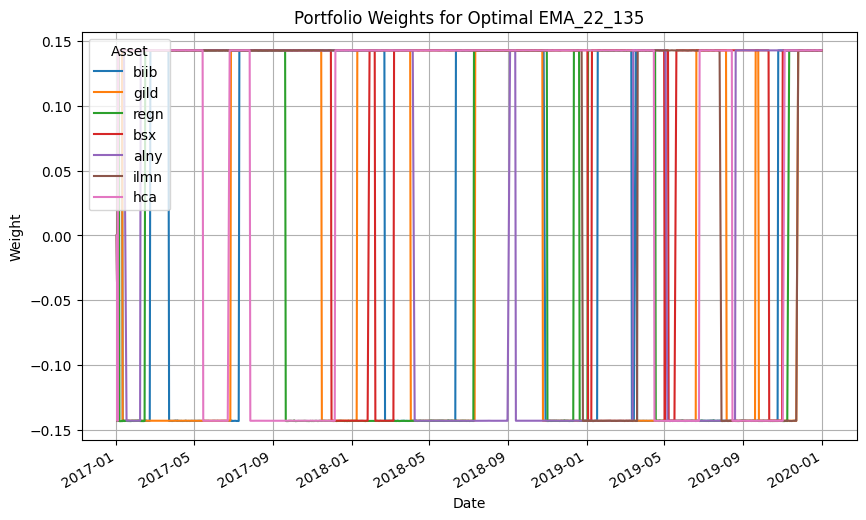

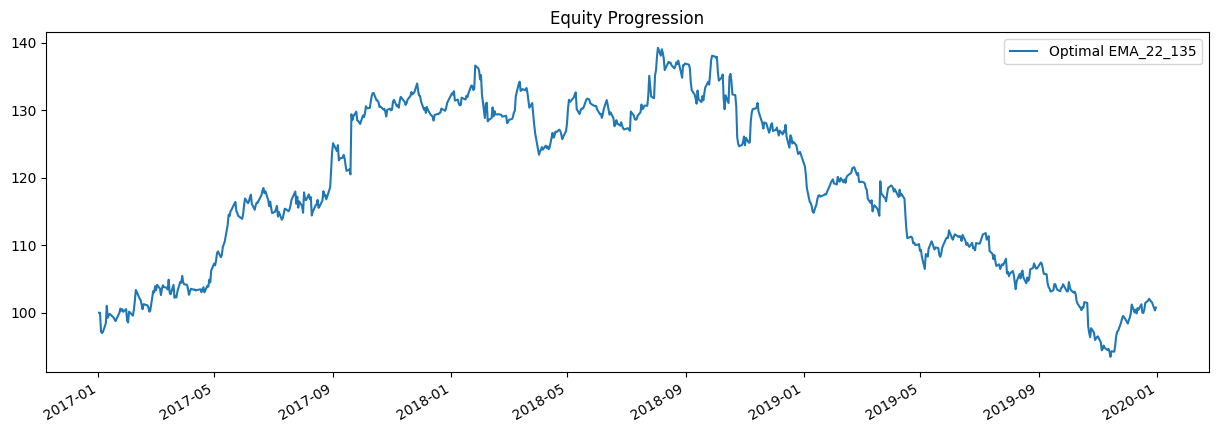

<Figure size 1500x800 with 0 Axes>

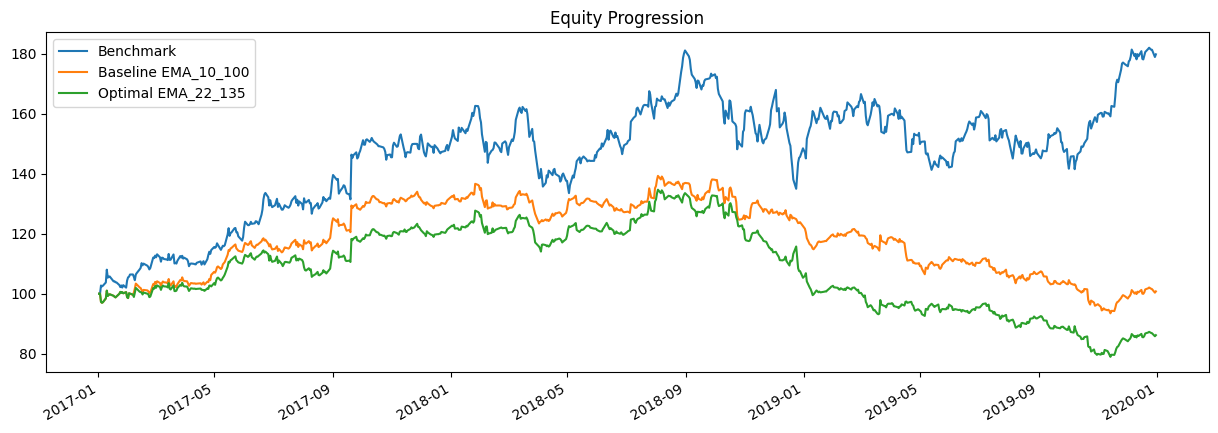

In [ ]:
# Extract metrics
optimal_metrics = {
    'Total Return': f"{results_ema_optimal.stats.loc['total_return'][column_name_ema]:.2%}",
    'Daily Sharpe': f"{results_ema_optimal.stats.loc['daily_sharpe'][column_name_ema]:.2f}",
    'Daily Sortino': f"{results_ema_optimal.stats.loc['daily_sortino'][column_name_ema]:.2f}",
    'CAGR': f"{results_ema_optimal.stats.loc['cagr'][column_name_ema]:.2%}",
    'Max Drawdown': f"{results_ema_optimal.stats.loc['max_drawdown'][column_name_ema]:.2%}",
    'Calmar Ratio': f"{results_ema_optimal.stats.loc['calmar'][column_name_ema]:.2f}"
}

# Update the summary DataFrame with the new metrics under the dynamically named column
for metric in summary_df['Stat']:
    summary_df.loc[summary_df['Stat'] == metric, column_name_ema] = optimal_metrics[metric]

# Display the updated DataFrame
print(summary_df)



# ############################### PLOTS ############################################
# Get the portfolio weights for the dynamically named optimal strategy
weights_ema_optimal = results_ema_optimal.get_security_weights(column_name_ema)

# Plotting the portfolio weights
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the weights. Since the weights are stored in a DataFrame, you can plot directly.
weights_ema_optimal.plot(ax=ax, title=f'Portfolio Weights for {column_name_ema}')
ax.set_xlabel('Date')
ax.set_ylabel('Weight')
ax.legend(title='Asset', loc='upper left')
ax.grid(True)

plt.show()

# Equity Curve
results_ema_optimal.plot()

# Plot the equity curves with Benchmark
plt.figure(figsize=(15, 8))
# Plotting each strategy on the same axes
ax = res_benchmark.plot(title='Equity Curve: Baseline, Optimized & Benchmark')
results_ema_optimal.plot(ax=ax)  # Ensure it uses the same axis
res_ema_baseline.plot(ax=ax)  # Ensure it uses the same axis
plt.legend(['Benchmark','Baseline EMA_10_100', f'{column_name_ema}'])
plt.show()


# RSI-based mean reversion strategy

## Baseline RSI

            Stat Benchmark Baseline_ema_10_100 Optimal EMA_22_135 RSI_14_30_70
0   Total Return    79.74%             -13.80%              0.78%      159.83%
1   Daily Sharpe      0.97               -0.27               0.09         0.89
2  Daily Sortino      1.67               -0.44               0.15         1.66
3           CAGR    21.65%              -4.84%              0.26%       37.59%
4   Max Drawdown   -25.46%             -41.34%            -32.88%      -36.63%
5   Calmar Ratio      0.85               -0.12               0.01         1.03


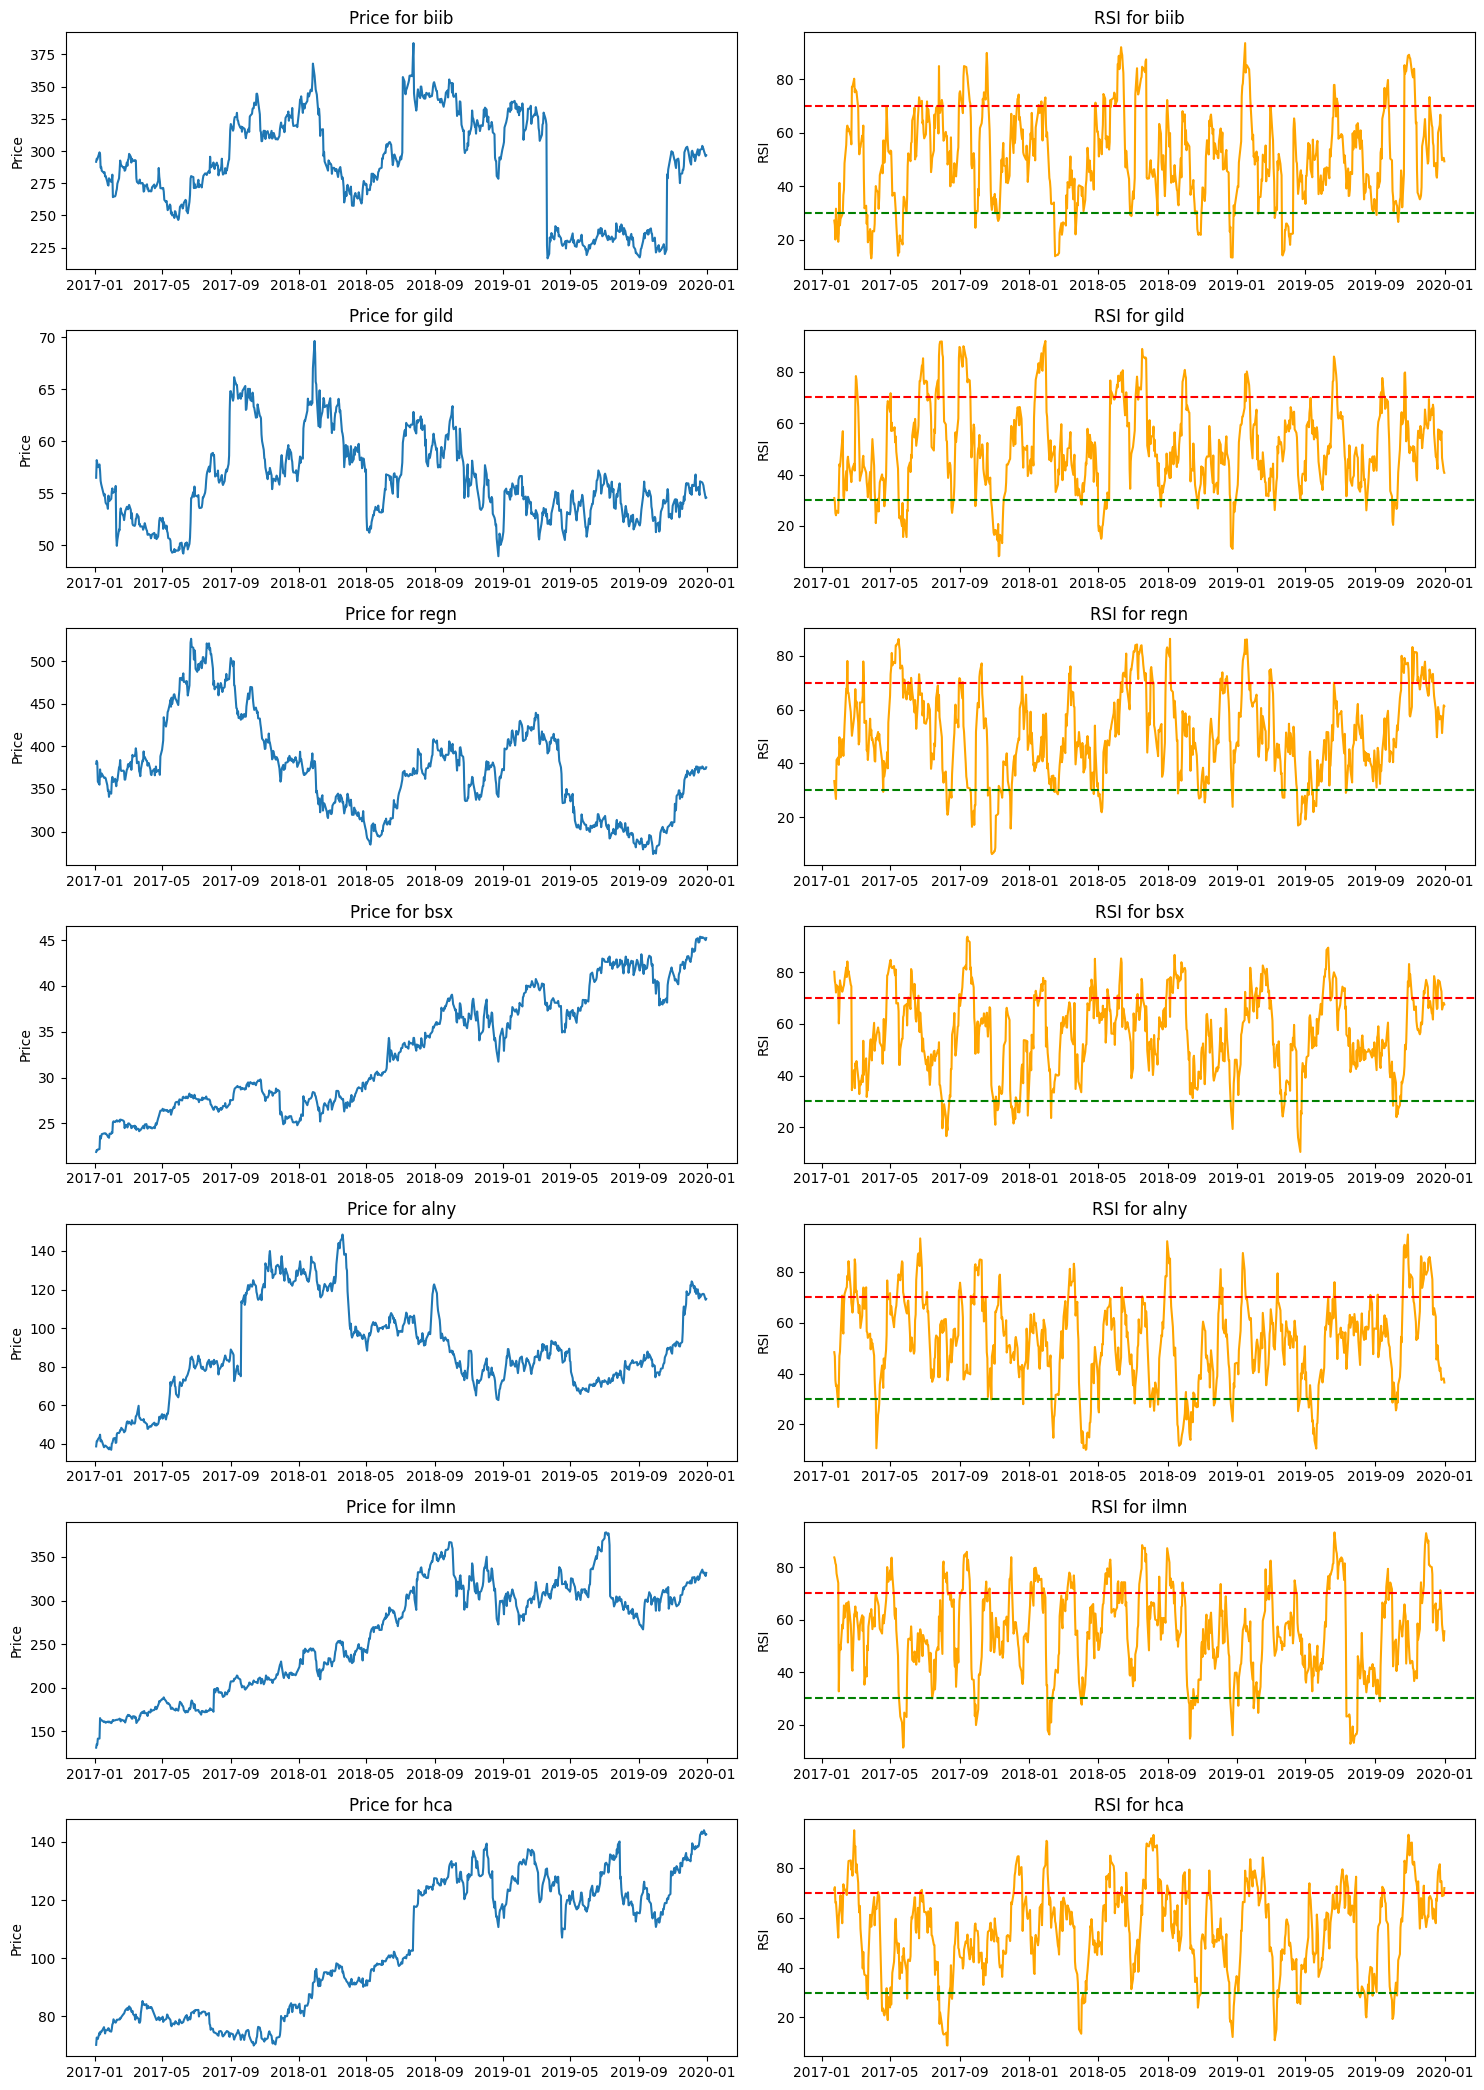

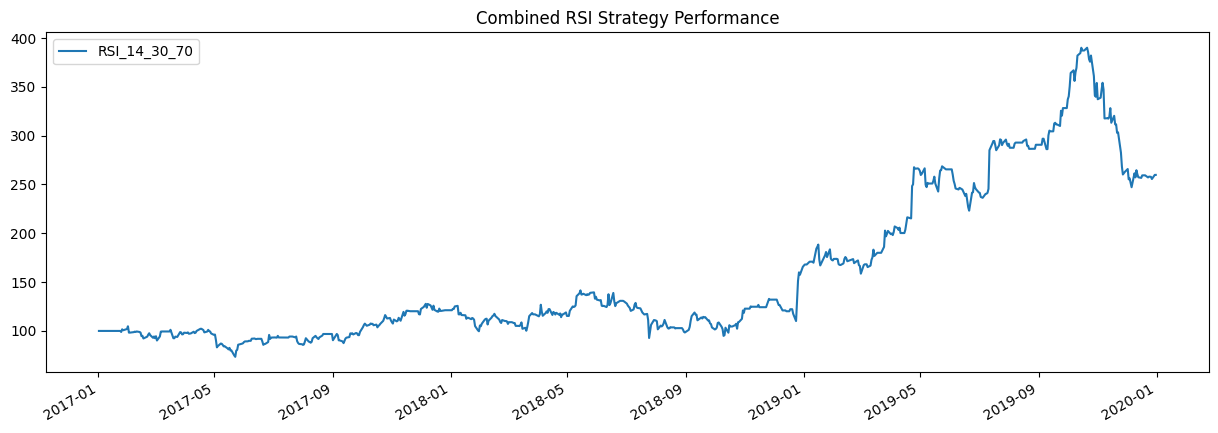

<Figure size 1500x800 with 0 Axes>

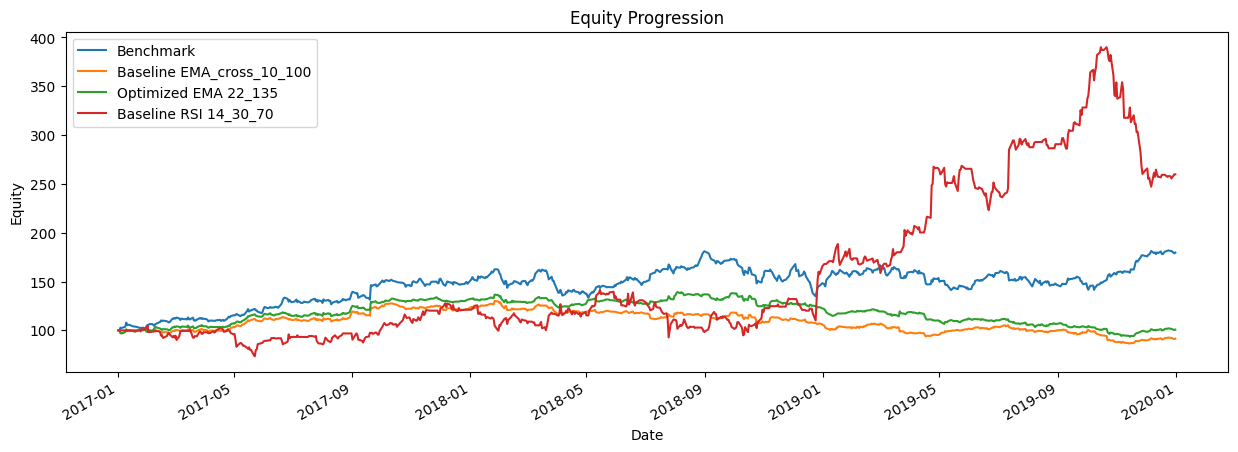

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import bt

# RSI calculation function
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Load data
tickers = ['biib', 'gild', 'regn', 'bsx', 'alny', 'ilmn', 'hca']
data = bt.get(tickers, start='2017-01-01', end='2020-01-01')

# Create a DataFrame for RSI values and signals
rsi_values = pd.DataFrame(index=data.index)
signals = pd.DataFrame(index=data.index, columns=data.columns)

# Calculate RSI for each stock and generate signals
for ticker in tickers:
    rsi_values[ticker] = RSI(data[ticker])
    signals[ticker] = 0
    signals.loc[rsi_values[ticker] < 30, ticker] = 1  # Buy signal
    signals.loc[rsi_values[ticker] > 70, ticker] = -1  # Sell signal

# Shift signals to avoid forward-looking bias
signals = signals.shift(1)

# Create and run the strategy
strategy_RSI = bt.Strategy('RSI_14_30_70', [bt.algos.WeighTarget(signals), bt.algos.Rebalance()])
backtest_RSI = bt.Backtest(strategy_RSI, data)
result_rsi = bt.run(backtest_RSI)

# # Display performance metrics
# print(result_rsi.display())

# Assuming summary_df exists and has the correct format
metrics_rsi_bl = {
    'Total Return': f"{result_rsi.stats.loc['total_return', 'RSI_14_30_70']:.2%}",
    'Daily Sharpe': f"{result_rsi.stats.loc['daily_sharpe', 'RSI_14_30_70']:.2f}",
    'Daily Sortino': f"{result_rsi.stats.loc['daily_sortino', 'RSI_14_30_70']:.2f}",
    'CAGR': f"{result_rsi.stats.loc['cagr', 'RSI_14_30_70']:.2%}",
    'Max Drawdown': f"{result_rsi.stats.loc['max_drawdown', 'RSI_14_30_70']:.2%}",
    'Calmar Ratio': f"{result_rsi.stats.loc['calmar', 'RSI_14_30_70']:.2f}"
}

# Update the summary DataFrame
for index, row in summary_df.iterrows():
    metric = row['Stat']
    summary_df.loc[index, 'RSI_14_30_70'] = metrics_rsi_bl[metric]

# Display the updated DataFrame
print(summary_df)

# Plotting
fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(15, 3 * len(tickers)))

for i, ticker in enumerate(tickers):
    # Plot stock price and RSI
    axes[i, 0].plot(data[ticker], label='Price')
    axes[i, 0].set_title(f'Price for {ticker}')
    axes[i, 0].set_ylabel('Price')

    axes[i, 1].plot(rsi_values[ticker], label='RSI', color='orange')
    axes[i, 1].set_title(f'RSI for {ticker}')
    axes[i, 1].set_ylabel('RSI')
    axes[i, 1].axhline(70, color='red', linestyle='--')
    axes[i, 1].axhline(30, color='green', linestyle='--')

plt.tight_layout()
plt.show()

# Plot the combined backtest result
result_rsi.plot(title='Combined RSI Strategy Performance')
plt.show()


# Plot the equity curves with Benchmark
plt.figure(figsize=(15, 8))
# Assuming 'ax' will be used for all plotting to ensure they share the same axis
ax = res_benchmark.plot(title='Equity Curves for Training Period')
res_MA.plot(ax=ax)  # Baseline EMA strategy
results_ema_optimal.plot(ax=ax)  # Optimized EMA strategy
result_rsi.plot(ax=ax)  # Baseline RSI strategy

# Here, I'm directly using string names. You should replace these with the variable names if they are variable.
plt.legend(['Benchmark', 'Baseline EMA_cross_10_100', 'Optimized EMA 22_135', 'Baseline RSI 14_30_70'])
plt.xlabel('Date')  # Optional: Label for the X-axis
plt.ylabel('Equity')  # Optional: Label for the Y-axis
plt.show()


## Optimization

Best Total Return: Lower RSI 45, Upper RSI 80 with value 36.38
Best Daily Sharpe: Lower RSI 30, Upper RSI 80 with value 2.01
Best Daily Sortino: Lower RSI 30, Upper RSI 85 with value 4.74
Best CAGR: Lower RSI 45, Upper RSI 80 with value 2.35
Best Calmar: Lower RSI 30, Upper RSI 80 with value 5.70


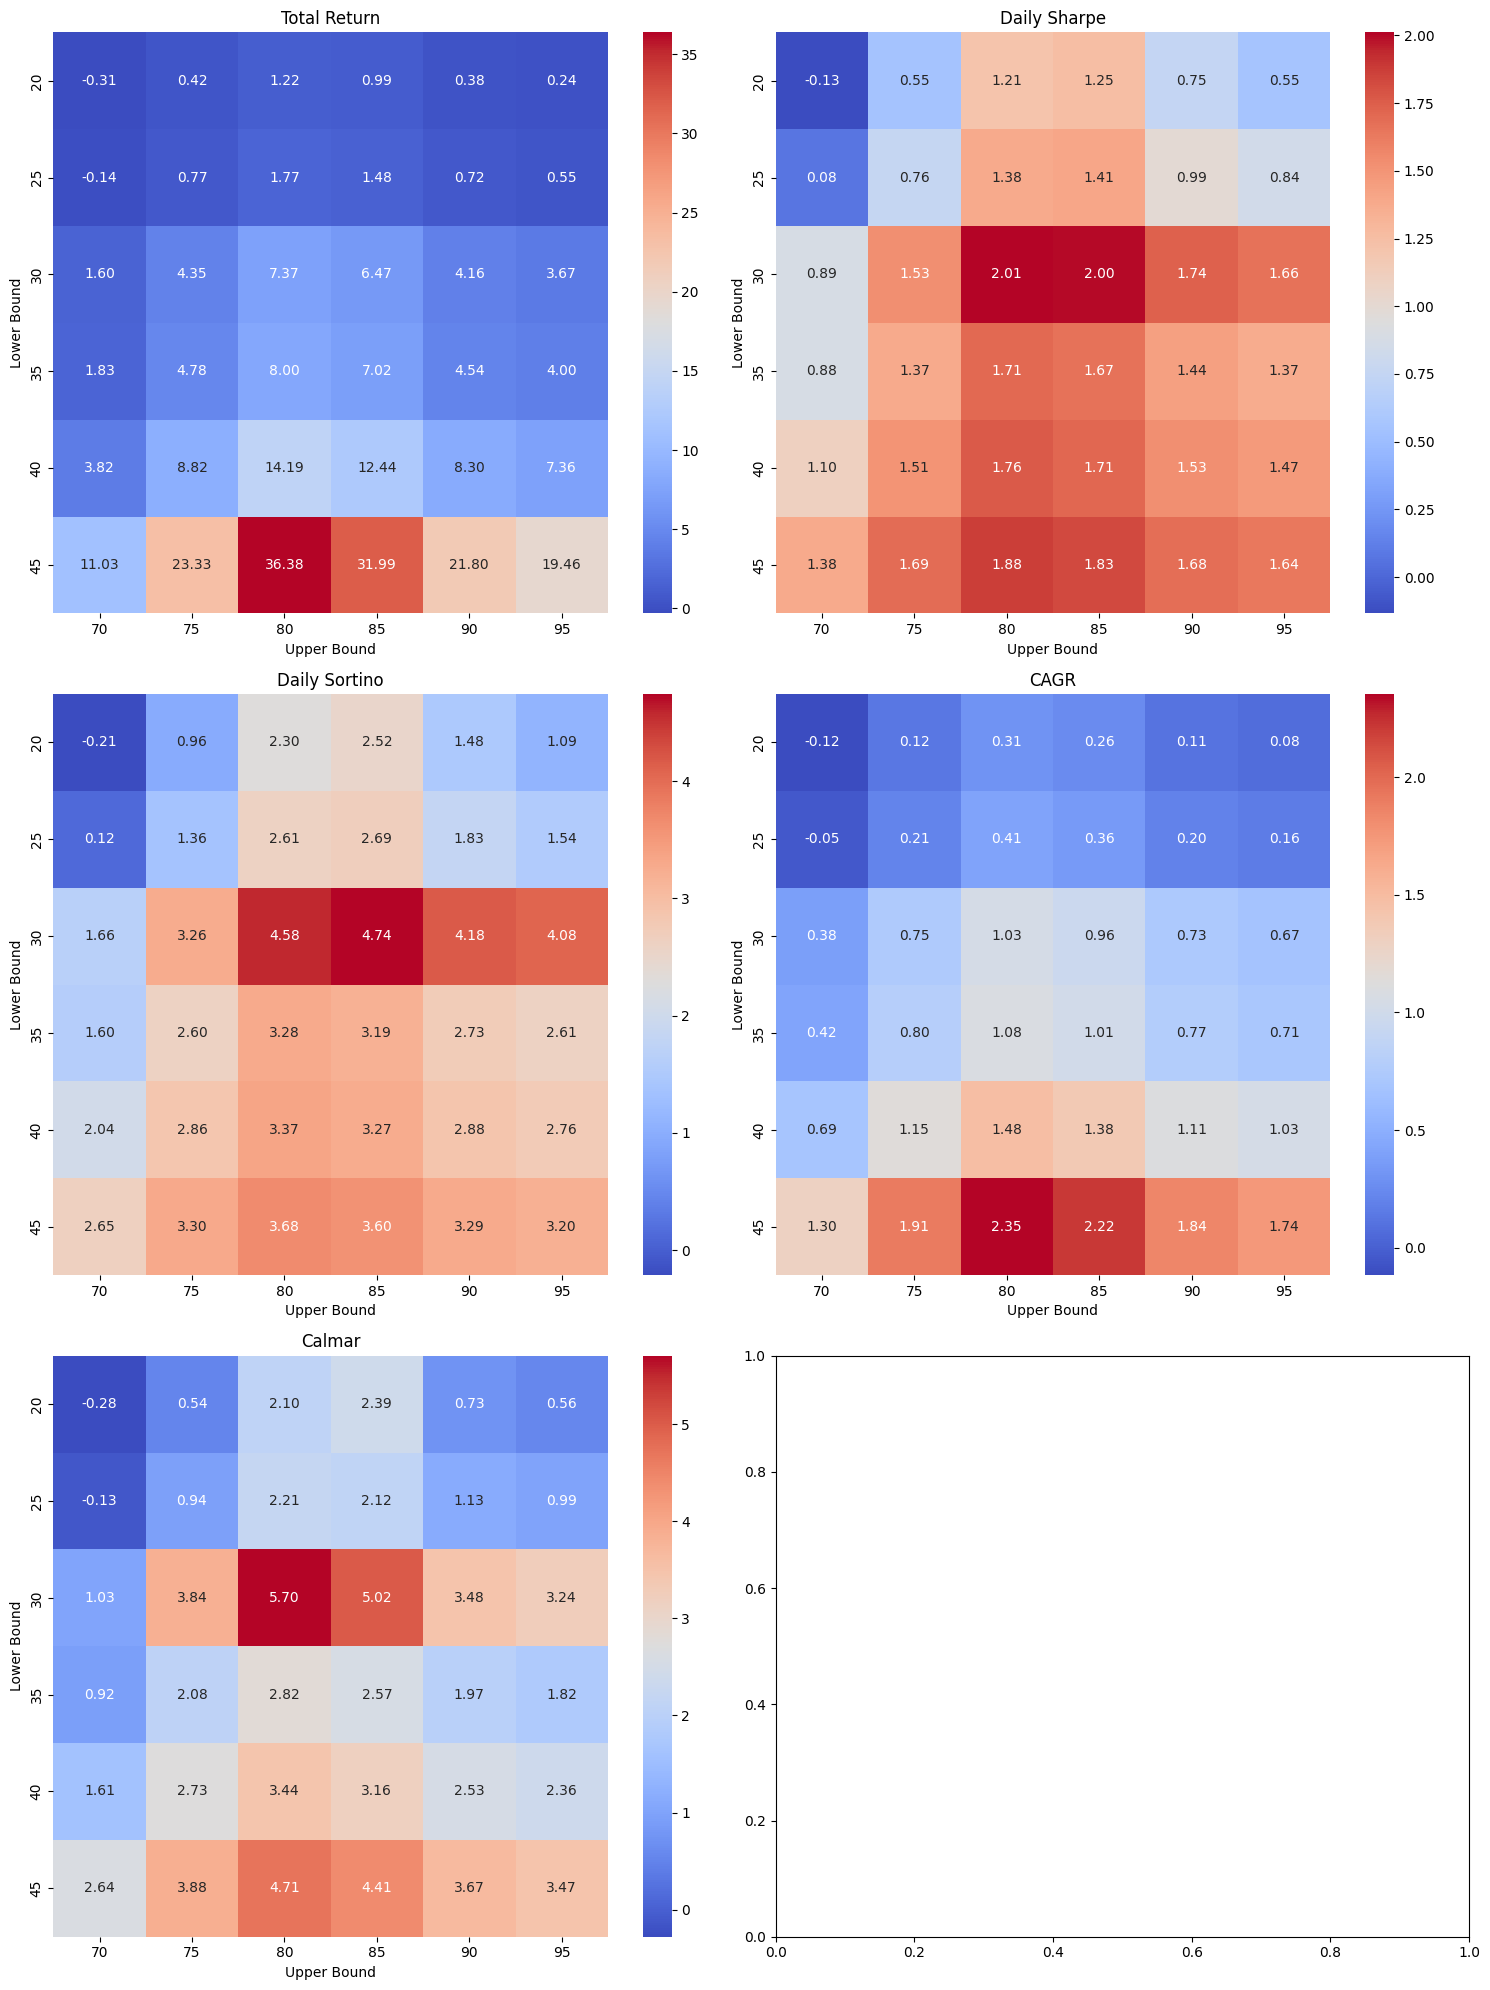

Best combination for Total Return is Lower RSI 45 and Upper RSI 80
Best combination for Daily Sharpe is Lower RSI 30 and Upper RSI 80
Best combination for Daily Sortino is Lower RSI 30 and Upper RSI 85
Best combination for CAGR is Lower RSI 45 and Upper RSI 80
Best combination for Calmar is Lower RSI 30 and Upper RSI 80


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import bt
import seaborn as sns

# Define the RSI function
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Load data
tickers = ['BIIB', 'GILD', 'REGN', 'BSX', 'ALNY', 'ILMN', 'HCA']
data = bt.get(tickers, start='2017-01-01', end='2020-01-01')

# Set RSI bounds and metrics
lower_bounds = range(20, 46, 5)
upper_bounds = range(70, 96, 5)
metrics = ['Total Return', 'Daily Sharpe', 'Daily Sortino', 'CAGR', 'Calmar']

# Prepare to store results in dataframes
dfs = {metric: pd.DataFrame(index=lower_bounds, columns=upper_bounds) for metric in metrics}
best_combinations_rsi = {}

# Run RSI strategy across bounds
for lower in lower_bounds:
    for upper in upper_bounds:
        rsi_values = data.apply(lambda x: RSI(x, window=14))
        signals = pd.DataFrame(index=data.index, columns=data.columns)
        signals[rsi_values < lower] = 1
        signals[rsi_values > upper] = -1
        signals[(rsi_values >= lower) & (rsi_values <= upper)] = 0
        signals = signals.shift(1)

        strategy_name = f'RSI_14_{lower}_{upper}'
        strategy_RSI = bt.Strategy(strategy_name, [bt.algos.WeighTarget(signals), bt.algos.Rebalance()])
        backtest_RSI = bt.Backtest(strategy_RSI, data)
        result_RSI = bt.run(backtest_RSI)

        for metric in metrics:
            dfs[metric].at[lower, upper] = result_RSI.stats.at[metric.lower().replace(' ', '_'), strategy_name]

# Plot heatmaps
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()  # Flatten axes array for easier iteration
for ax, (metric, df) in zip(axes, dfs.items()):
    sns.heatmap(df.astype(float), ax=ax, annot=True, fmt=".2f", cmap="coolwarm")
    ax.set_title(metric)
    ax.set_xlabel('Upper Bound')
    ax.set_ylabel('Lower Bound')
    max_value = df.max().max()
    best_combination = df.stack().idxmax()
    best_combinations_rsi[metric] = best_combination
    print(f"Best {metric}: Lower RSI {best_combination[0]}, Upper RSI {best_combination[1]} with value {max_value:.2f}")

plt.tight_layout()
plt.show()

# Print best combinations from the earlier calculated values
for metric, combo in best_combinations_rsi.items():
    print(f"Best combination for {metric} is Lower RSI {combo[0]} and Upper RSI {combo[1]}")


## Run on optimals

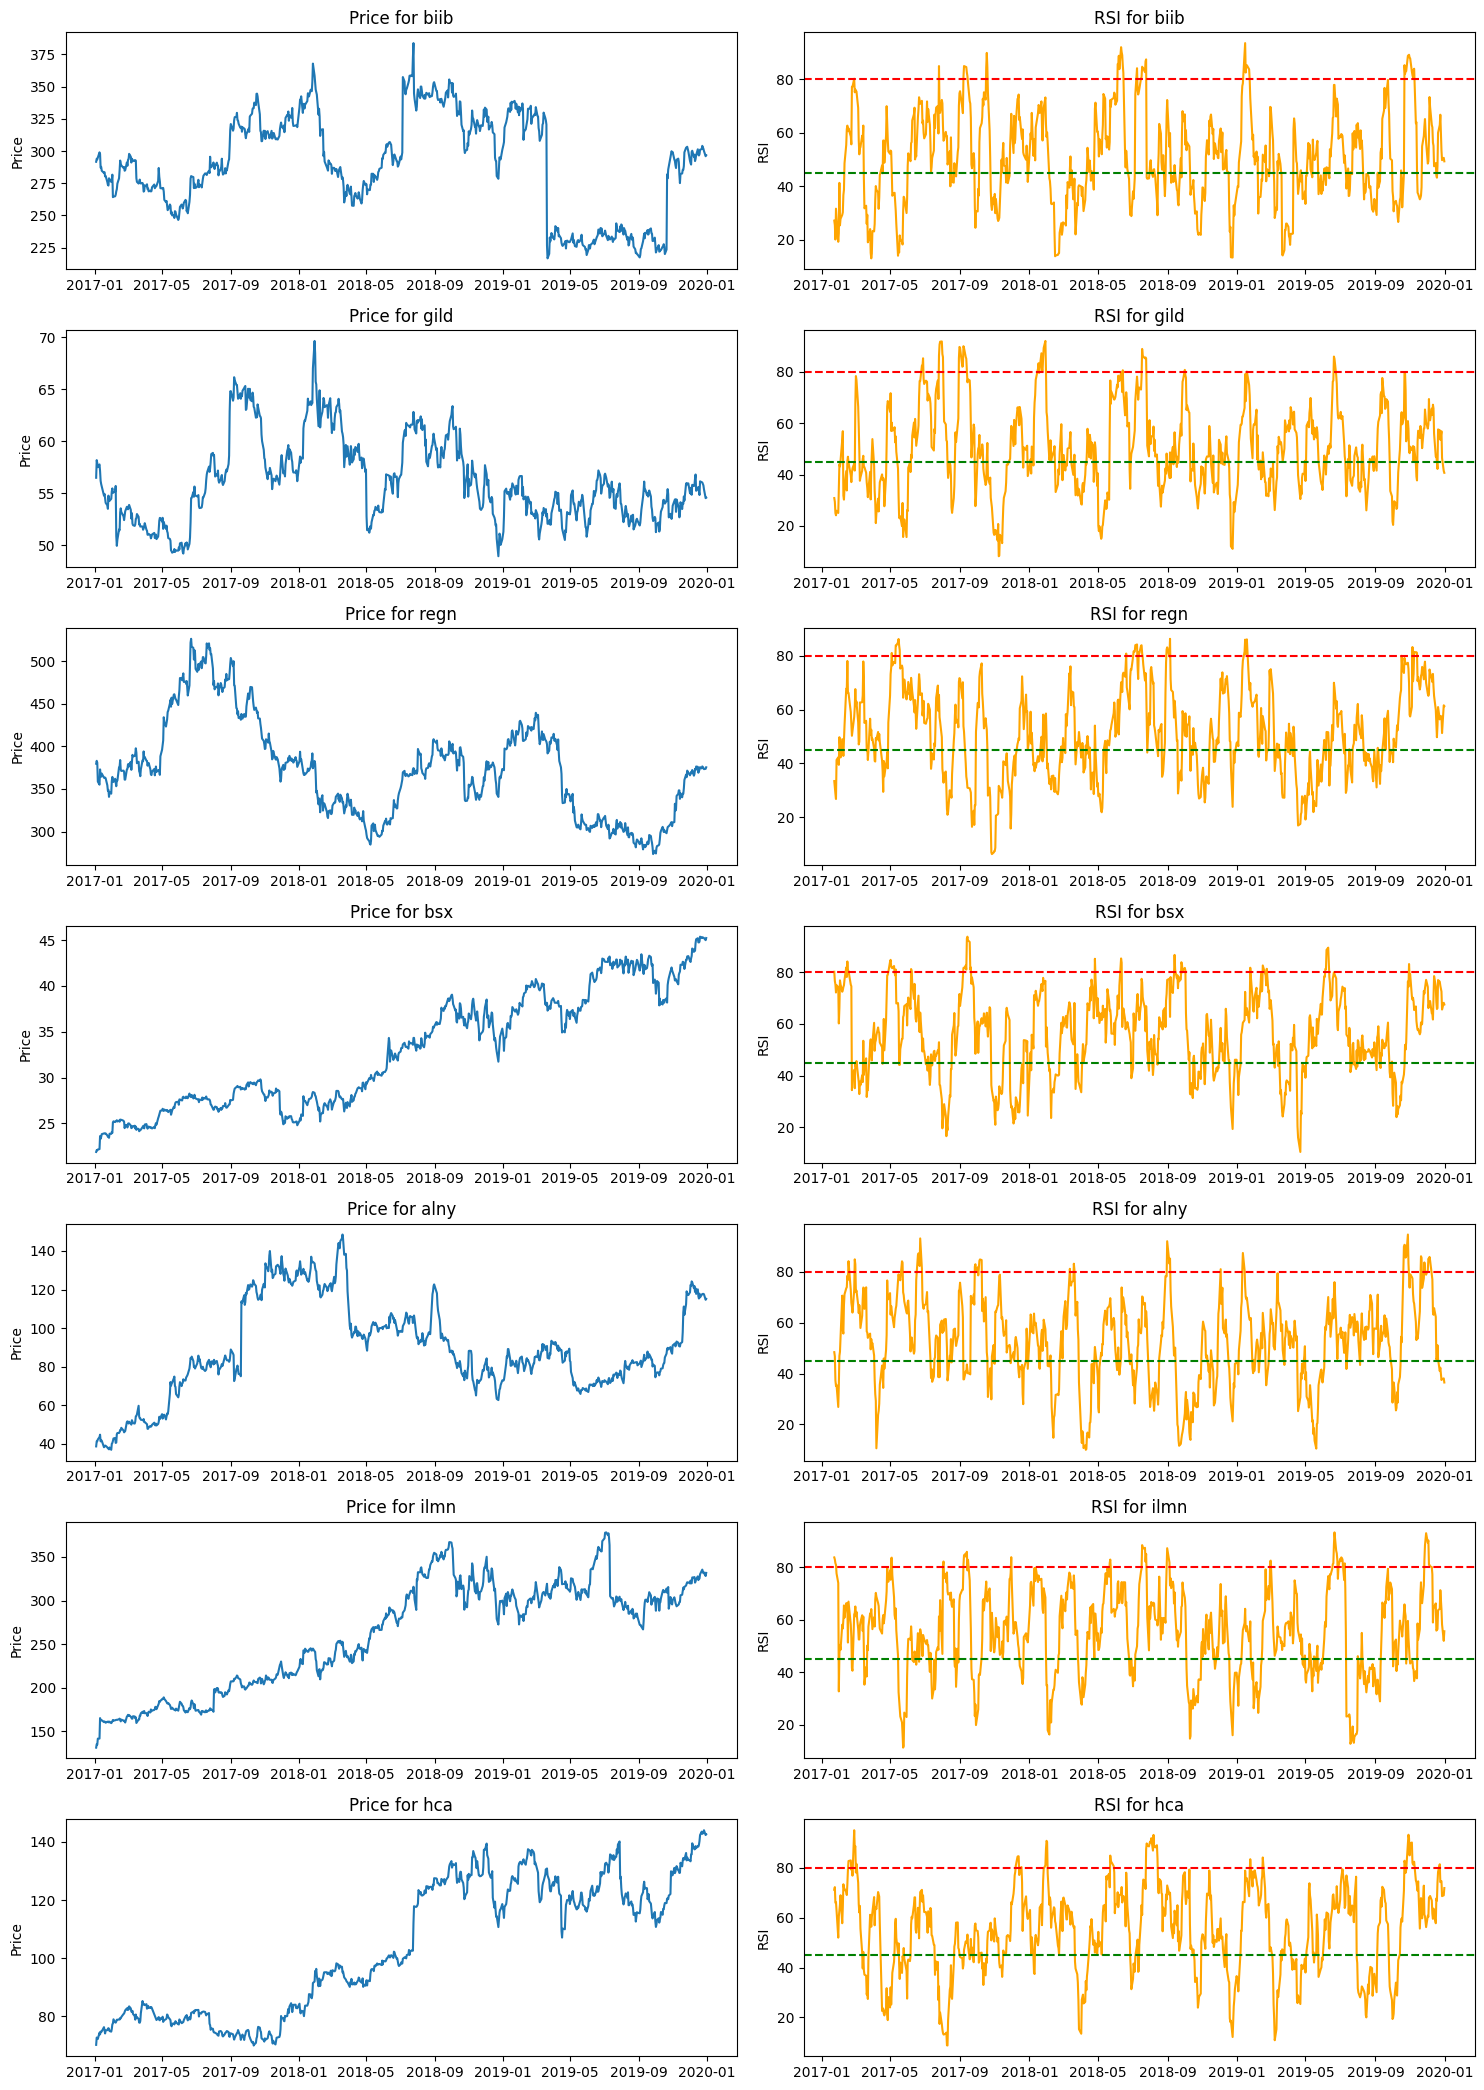

In [ ]:
# Optimal RSI settings from best_combinations for 'Total Return'
optimal_rsi_lower = best_combinations_rsi['Total Return'][0]
optimal_ris_higher = best_combinations_rsi['Total Return'][1]

# Column name dynamically generated from RSI values
column_name_rsi = f"Optimal_rsi_14_{optimal_rsi_lower}_{optimal_ris_higher}"

# RSI calculation function
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Load data
tickers = ['biib', 'gild', 'regn', 'bsx', 'alny', 'ilmn', 'hca']
data = bt.get(tickers, start='2017-01-01', end='2020-01-01')

# Create a DataFrame for RSI values and signals
rsi_values = pd.DataFrame(index=data.index)
signals = pd.DataFrame(index=data.index, columns=data.columns)

# Calculate RSI for each stock and generate signals
for ticker in tickers:
    rsi_values[ticker] = RSI(data[ticker])
    signals[ticker] = 0
    signals.loc[rsi_values[ticker] < 45, ticker] = 1  # Buy signal
    signals.loc[rsi_values[ticker] > 80, ticker] = -1  # Sell signal

# Shift signals to avoid forward-looking bias
signals = signals.shift(1)

# Create and run the strategy
strategy_RSI = bt.Strategy(column_name_rsi, [bt.algos.WeighTarget(signals), bt.algos.Rebalance()])
backtest_RSI = bt.Backtest(strategy_RSI, data)
results_rsi_optimal = bt.run(backtest_RSI)

# Plotting
fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(15, 3 * len(tickers)))

for i, ticker in enumerate(tickers):
    # Plot stock price and RSI
    axes[i, 0].plot(data[ticker], label='Price')
    axes[i, 0].set_title(f'Price for {ticker}')
    axes[i, 0].set_ylabel('Price')

    axes[i, 1].plot(rsi_values[ticker], label='RSI', color='orange')
    axes[i, 1].set_title(f'RSI for {ticker}')
    axes[i, 1].set_ylabel('RSI')
    axes[i, 1].axhline(80, color='red', linestyle='--')
    axes[i, 1].axhline(45, color='green', linestyle='--')

plt.tight_layout()
plt.show()



## Result

In [ ]:
# # Assuming df_summary is your DataFrame
# summary_df = summary_df.drop(columns=['Optimal_rsi_14_80_45'])

summary_df


Stat Benchmark Baseline_ema_10_100 Optimal EMA_22_135  \
0   Total Return    79.74%             -13.80%              0.78%   
1   Daily Sharpe      0.97               -0.27               0.09   
2  Daily Sortino      1.67               -0.44               0.15   
3           CAGR    21.65%              -4.84%              0.26%   
4   Max Drawdown   -25.46%             -41.34%            -32.88%   
5   Calmar Ratio      0.85               -0.12               0.01   

  RSI_14_30_70 Optimal_rsi_14_45_80  
0      159.83%             3638.39%  
1         0.89                 1.88  
2         1.66                 3.68  
3       37.59%              235.39%  
4      -36.63%              -49.96%  
5         1.03                 4.71

            Stat Benchmark Baseline_ema_10_100 Optimal EMA_22_135  \
0   Total Return    79.74%             -13.80%              0.78%   
1   Daily Sharpe      0.97               -0.27               0.09   
2  Daily Sortino      1.67               -0.44               0.15   
3           CAGR    21.65%              -4.84%              0.26%   
4   Max Drawdown   -25.46%             -41.34%            -32.88%   
5   Calmar Ratio      0.85               -0.12               0.01   

  RSI_14_30_70 Optimal_rsi_14_45_80  
0      159.83%             3638.39%  
1         0.89                 1.88  
2         1.66                 3.68  
3       37.59%              235.39%  
4      -36.63%              -49.96%  
5         1.03                 4.71  


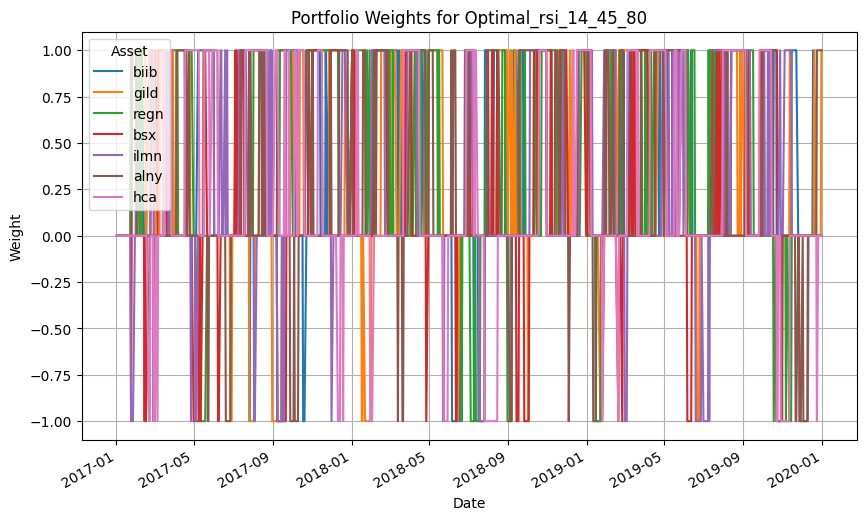

<Figure size 1500x800 with 0 Axes>

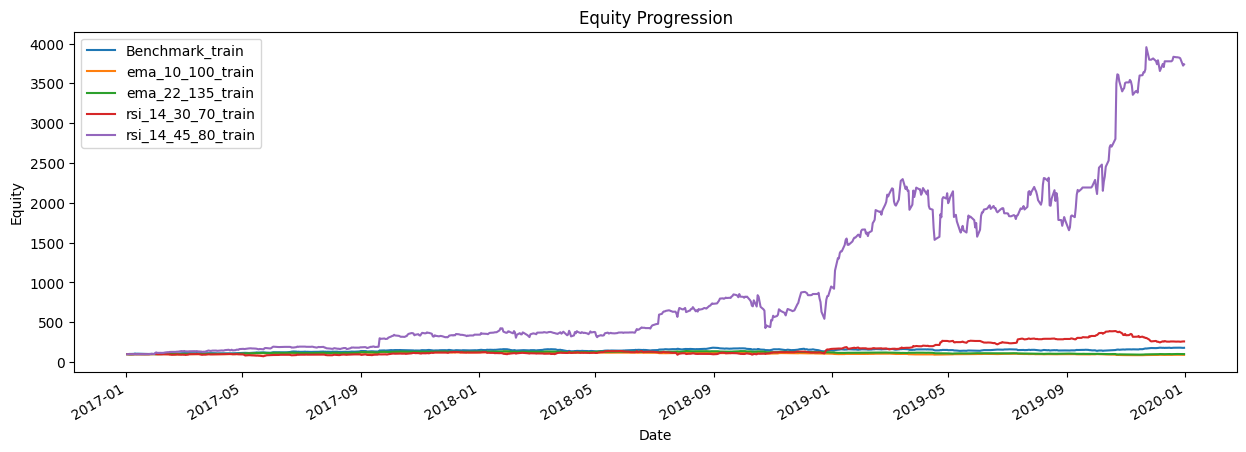

In [ ]:
# Extract metrics
optimal_metrics_rsi = {
    'Total Return': f"{results_rsi_optimal.stats.loc['total_return'][column_name_rsi]:.2%}",
    'Daily Sharpe': f"{results_rsi_optimal.stats.loc['daily_sharpe'][column_name_rsi]:.2f}",
    'Daily Sortino': f"{results_rsi_optimal.stats.loc['daily_sortino'][column_name_rsi]:.2f}",
    'CAGR': f"{results_rsi_optimal.stats.loc['cagr'][column_name_rsi]:.2%}",
    'Max Drawdown': f"{results_rsi_optimal.stats.loc['max_drawdown'][column_name_rsi]:.2%}",
    'Calmar Ratio': f"{results_rsi_optimal.stats.loc['calmar'][column_name_rsi]:.2f}"
}

# Update the summary DataFrame with the new metrics under the dynamically named column
for metric in summary_df['Stat']:
    summary_df.loc[summary_df['Stat'] == metric, column_name_rsi] = optimal_metrics_rsi[metric]

# Display the updated DataFrame
print(summary_df)



# ############################### PLOTS ############################################
# Get the portfolio weights for the dynamically named optimal strategy
weights_rsi_optimal = results_rsi_optimal.get_security_weights(column_name_rsi)

# Plotting the portfolio weights
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the weights. Since the weights are stored in a DataFrame, you can plot directly.
weights_rsi_optimal.plot(ax=ax, title=f'Portfolio Weights for {column_name_rsi}')
ax.set_xlabel('Date')
ax.set_ylabel('Weight')
ax.legend(title='Asset', loc='upper left')
ax.grid(True)

plt.show()

# # Equity Curve
# results_rsi_optimal.plot()
plt.figure(figsize=(15, 8))
# Assuming 'ax' will be used for all plotting to ensure they share the same axis
ax = res_benchmark.plot(title='Equity Progression')
res_MA.plot(ax=ax)  # Baseline EMA strategy
results_ema_optimal.plot(ax=ax)  # Optimized EMA strategy
result_rsi.plot(ax=ax)  # Baseline RSI strategy
results_rsi_optimal.plot(ax=ax)
# Here, I'm directly using string names. You should replace these with the variable names if they are variable.
plt.legend(['Benchmark_train', 'ema_10_100_train', 'ema_22_135_train', 'rsi_14_30_70_train','rsi_14_45_80_train'])

plt.xlabel('Date')  # Optional: Label for the X-axis
plt.ylabel('Equity')  # Optional: Label for the Y-axis
plt.show()

# Tesing On New Period

In [ ]:
##### Baseline EMA Cross over ######
# Define tickers and date range
tickers = ['BIIB', 'GILD', 'REGN', 'BSX', 'ALNY', 'ILMN', 'HCA']
start_date_test = '2020-01-01'
end_date_test = '2023-01-01'
# Load data
data_test = bt.get(tickers, start=start_date_test, end=end_date_test)


# Benchmark

# Set up the benchmark Buy and Hold strategy
benchmark_strat_test = bt.Strategy('Benchmark_test', [bt.algos.RunOnce(),
                                                bt.algos.SelectAll(),
                                                bt.algos.WeighEqually(),
                                                bt.algos.Rebalance()])
# Backtest the benchmark strategy
bt_benchmark_test = bt.Backtest(benchmark_strat_test, data_test)
res_benchmark_test = bt.run(bt_benchmark_test)

############################################################################################################
# Strategy 1
EMA_short_10_100 = data_test.ewm(span=10).mean()
EMA_long_10_100 = data_test.ewm(span=100).mean()

# Create signal DataFrame
signal_ema_10_100 = EMA_short_10_100.copy()
signal_ema_10_100[EMA_long_10_100.isnull()] = 0

# Construct the signal
magnitude = 1 / len(tickers)
signal_ema_10_100[EMA_short_10_100 > EMA_long_10_100] = magnitude
signal_ema_10_100[EMA_short_10_100 <= EMA_long_10_100] = -magnitude

# Construct strategy based on signal
ema_10_100 = bt.Strategy('ema_10_100_test',
                       [bt.algos.WeighTarget(signal_ema_10_100),
                        bt.algos.Rebalance()])

# Backtest
bt_ema_10_100_test = bt.Backtest(ema_10_100, data_test)
res_ema_10_100_test = bt.run(bt_ema_10_100_test)

###########################################################################################################
# Strategy 2 - Optimial EMAs
EMA_short_22_135 = data_test.ewm(span=22).mean()
EMA_long_22_135 = data_test.ewm(span=135).mean()

# Create signal DataFrame
signal_ema_22_135 = EMA_short_22_135.copy()
signal_ema_22_135[EMA_long_22_135.isnull()] = 0

# Construct the signal
magnitude = 1 / len(tickers)
signal_ema_22_135[EMA_short_22_135 > EMA_long_22_135] = magnitude
signal_ema_22_135[EMA_short_22_135 <= EMA_long_22_135] = -magnitude

# Construct strategy based on signal
ema_22_135 = bt.Strategy('ema_22_135_test',
                       [bt.algos.WeighTarget(signal_ema_22_135),
                        bt.algos.Rebalance()])

# Backtest
bt_ema_22_135_test = bt.Backtest(ema_22_135, data_test)
res_ema_22_135_test = bt.run(bt_ema_22_135_test)

###########################################################################################################
tickers = ['biib', 'gild', 'regn', 'bsx', 'alny', 'ilmn', 'hca']
# Strategy 3 - RSI bl
# RSI calculation function
def RSI(data_test, window=14):
    delta = data_test.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Create a DataFrame for RSI values and signals
rsi_values = pd.DataFrame(index=data_test.index)
signals_rsi_30_70 = pd.DataFrame(index=data_test.index, columns=data_test.columns)

# Calculate RSI for each stock and generate signals
for ticker in tickers:
    rsi_values[ticker] = RSI(data_test[ticker])
    signals_rsi_30_70[ticker] = 0
    signals_rsi_30_70.loc[rsi_values[ticker] < 30, ticker] = 1  # Buy signal
    signals_rsi_30_70.loc[rsi_values[ticker] > 70, ticker] = -1  # Sell signal

# Shift signals to avoid forward-looking bias
signals_rsi_30_70 = signals_rsi_30_70.shift(1)

# Create and run the strategy
strategy_RSI_test = bt.Strategy('rsi_14_30_70_test', [bt.algos.WeighTarget(signals_rsi_30_70), bt.algos.Rebalance()])
backtest_RSI_test = bt.Backtest(strategy_RSI_test, data_test)
res_rsi_30_70_test = bt.run(backtest_RSI_test)


###########################################################################################################
# Strategy 4 - RSI optimal
# RSI calculation function
def RSI(data_test, window=14):
    delta = data_test.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Create a DataFrame for RSI values and signals
rsi_values = pd.DataFrame(index=data_test.index)
signals_rsi_45_80 = pd.DataFrame(index=data_test.index, columns=data_test.columns)

# Calculate RSI for each stock and generate signals
for ticker in tickers:
    rsi_values[ticker] = RSI(data_test[ticker])
    signals_rsi_45_80[ticker] = 0
    signals_rsi_45_80.loc[rsi_values[ticker] < 45, ticker] = 1  # Buy signal
    signals_rsi_45_80.loc[rsi_values[ticker] > 80, ticker] = -1  # Sell signal

# Shift signals to avoid forward-looking bias
signals_rsi_45_80 = signals_rsi_45_80.shift(1)

# Create and run the strategy
strategy_RSI_test = bt.Strategy('rsi_14_45_80_test', [bt.algos.WeighTarget(signals_rsi_45_80), bt.algos.Rebalance()])
backtest_RSI_test = bt.Backtest(strategy_RSI_test, data_test)
res_rsi_45_80_test = bt.run(backtest_RSI_test)

## Results

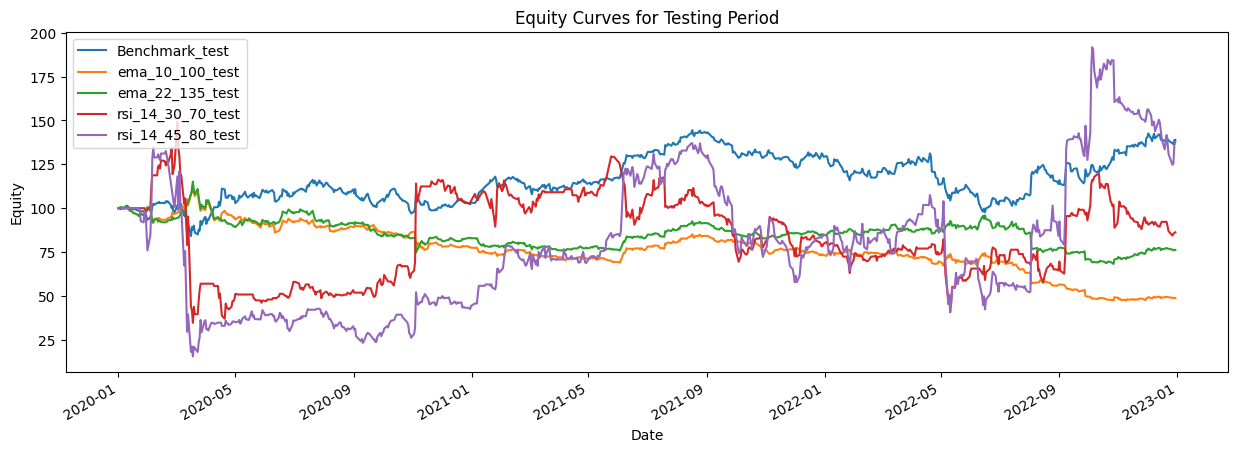

In [ ]:
# Plotting the equity curves on the same plot
plt.figure(figsize=(15, 8))

# Plot each backtest result
res_benchmark_test.plot(ax=plt.gca(), label='Benchmark')
res_ema_10_100_test.plot(ax=plt.gca(), label='EMA 10/100 (Baseline)')
res_ema_22_135_test.plot(ax=plt.gca(), label='EMA 22/135 (Optimal)')
result_rsi_30_70_test.plot(ax=plt.gca(), label='RSI 14/30/70 (Baseline)')
result_rsi_45_80_test.plot(ax=plt.gca(), label='RSI 14/45/80 (Optimal)')

plt.legend()
plt.title('Equity Curves for Testing Period')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.show()

In [ ]:
import pandas as pd

# Assuming 'result' objects are your results from the bt.run() for each strategy

# Create a dictionary for each strategy's metrics
def extract_strategy_metrics(result, strategy_name):
    return {
        'Total Return': f"{result.stats.loc['total_return'][strategy_name]:.2%}",
        'Daily Sharpe': f"{result.stats.loc['daily_sharpe'][strategy_name]:.2f}",
        'Daily Sortino': f"{result.stats.loc['daily_sortino'][strategy_name]:.2f}",
        'CAGR': f"{result.stats.loc['cagr'][strategy_name]:.2%}",
        'Max Drawdown': f"{result.stats.loc['max_drawdown'][strategy_name]:.2%}",
        'Calmar Ratio': f"{result.stats.loc['calmar'][strategy_name]:.2f}"
    }

benchmark_metrics = extract_strategy_metrics(res_benchmark_test, 'Benchmark_test')
ema_10_100_metrics = extract_strategy_metrics(res_ema_10_100_test, 'ema_10_100_test')
ema_22_135_metrics = extract_strategy_metrics(res_ema_22_135_test, 'ema_22_135_test')
rsi_30_70_metrics = extract_strategy_metrics(result_rsi_30_70_test, 'rsi_14_30_70_test')
rsi_45_80_metrics = extract_strategy_metrics(result_rsi_45_80_test, 'rsi_14_45_80_test')

# Creating DataFrame from dictionaries
metrics_data = {
    'Benchmark_test': benchmark_metrics,
    'ema_10_100_test': ema_10_100_metrics,
    'ema_22_135_test': ema_22_135_metrics,
    'rsi_14_30_70_test': rsi_30_70_metrics,
    'rsi_14_45_80_test': rsi_45_80_metrics
}

# Convert to DataFrame
summary_df_test = pd.DataFrame(metrics_data)


print(summary_df_test)


              Benchmark_test ema_10_100_test ema_22_135_test  \
Total Return          38.96%         -51.20%         -23.78%   
Daily Sharpe            0.54           -1.09           -0.37   
Daily Sortino           0.96           -1.59           -0.53   
CAGR                  11.61%         -21.30%          -8.67%   
Max Drawdown         -32.42%         -58.43%         -40.79%   
Calmar Ratio            0.36           -0.36           -0.21   

              rsi_14_30_70_test rsi_14_45_80_test  
Total Return            -13.77%            37.74%  
Daily Sharpe               0.37              0.71  
Daily Sortino              0.61              1.24  
CAGR                     -4.83%            11.28%  
Max Drawdown            -76.82%           -88.50%  
Calmar Ratio              -0.06              0.13  
